In [ ]:

Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

In [1]:
pip install pandas scikit-learn seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\sumit bhot\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt




In [6]:
wine_data = pd.read_csv(r"E:\Self project\Kaggle data set\WineQT.csv")

# Displaying the first few rows of the dataset
print("First few rows of the wine quality dataset:")
print(wine_data.head())

First few rows of the wine quality dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4      

In [8]:
# Q2. Handling missing data
# Check for missing values
print("\nMissing values in the wine quality dataset:")
print(wine_data.isnull().sum())

imputer = SimpleImputer(strategy='mean')
wine_data_imputed = pd.DataFrame(imputer.fit_transform(wine_data), columns=wine_data.columns)

# Check if missing values have been imputed
print("\nMissing values after imputation:")
print(wine_data_imputed.isnull().sum())


Missing values in the wine quality dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Missing values after imputation:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


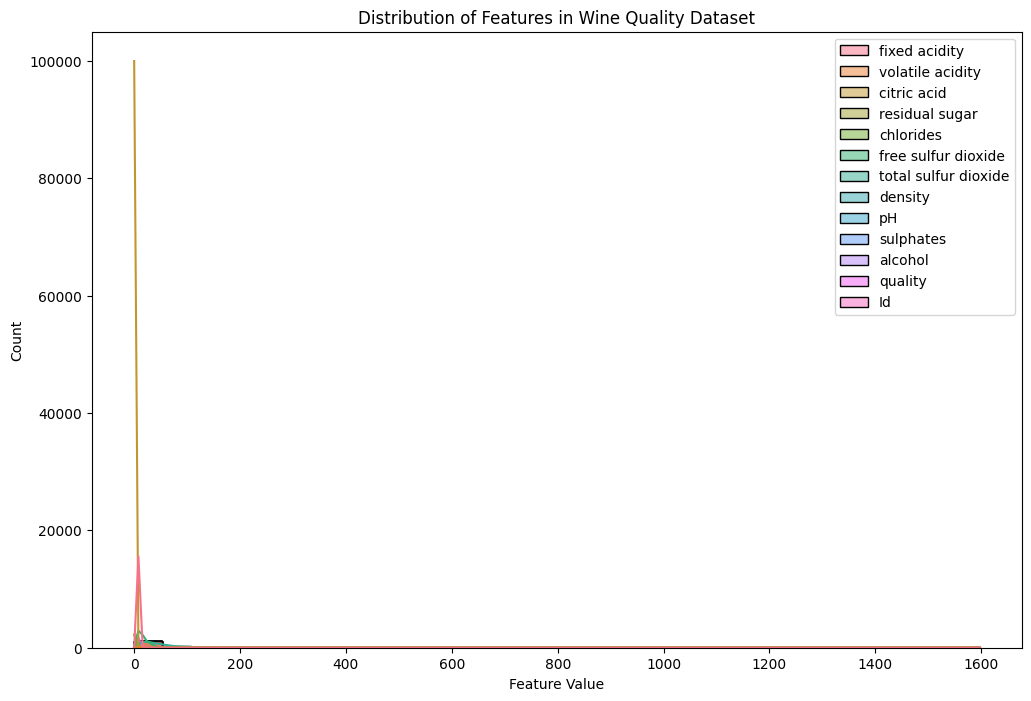

In [9]:

# Q3. Exploratory Data Analysis (EDA)
# Distribution of each feature
plt.figure(figsize=(12, 8))
sns.histplot(data=wine_data_imputed, kde=True, bins=30)
plt.title('Distribution of Features in Wine Quality Dataset')
plt.xlabel('Feature Value')
plt.ylabel('Count')
plt.show()


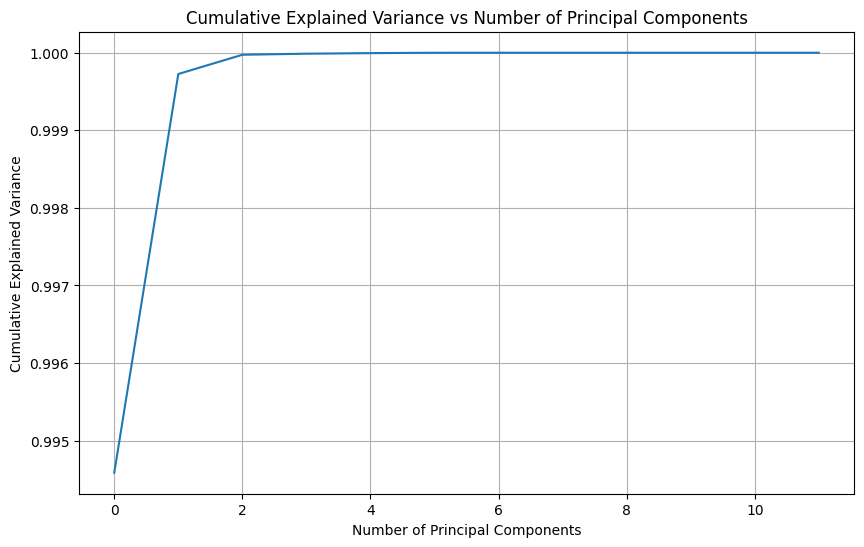

In [10]:
# Q4. Principal Component Analysis (PCA)
# Extracting features and target variable
X = wine_data_imputed.drop('quality', axis=1)
y = wine_data_imputed['quality']

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Plotting cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.grid()
plt.show()

In [11]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_90_variance = np.argmax(cumulative_variance >= 0.9) + 1
print("\nMinimum number of principal components required to explain 90% variance:", num_components_90_variance)


Minimum number of principal components required to explain 90% variance: 1
